In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
from emg.models.mlp import main as mlp_test 
from emg.models.cnn import main as cnn_test
from emg.models.lstm import main as lstm_test
from emg.models.c3d import main as c3d_test

In [3]:
def plot_confusion_matrix(matrix,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]))
    
    ax.set_xlabel(xlabel='True label', fontsize=20)
    ax.set_ylabel(ylabel='Predicted label', fontsize=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    fontsize=14,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [4]:
lstm_args = {
    'model': 'lstm',
    'name': 'Demon-8',
    'sub_folder': 'LSTM',
    'dataset': 'capg',
    'gesture_num': 8,
    'epoch': 30,
    'train_batch_size': 256,
    'valid_batch_size': 1024,
    'lr': 0.0001,
    'lr_step': 5,
    'stop_patience': 5
}

In [5]:
lstm_matrix = lstm_test(lstm_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[3348    5   18    6    1  358   61    3]
 [   9 2762  276  395   44    4  112  198]
 [  39  240 3250   41   34   22   92   82]
 [   7  192   58 2898  169    7   29  440]
 [  26   55  156  328 2879   10   23  323]
 [ 336    0    5    0    2 3367   88    2]
 [  58   58   55   28   10  149 3280  162]
 [  13   58   26  172   96   20  121 3294]]
test accuracy: 0.8248


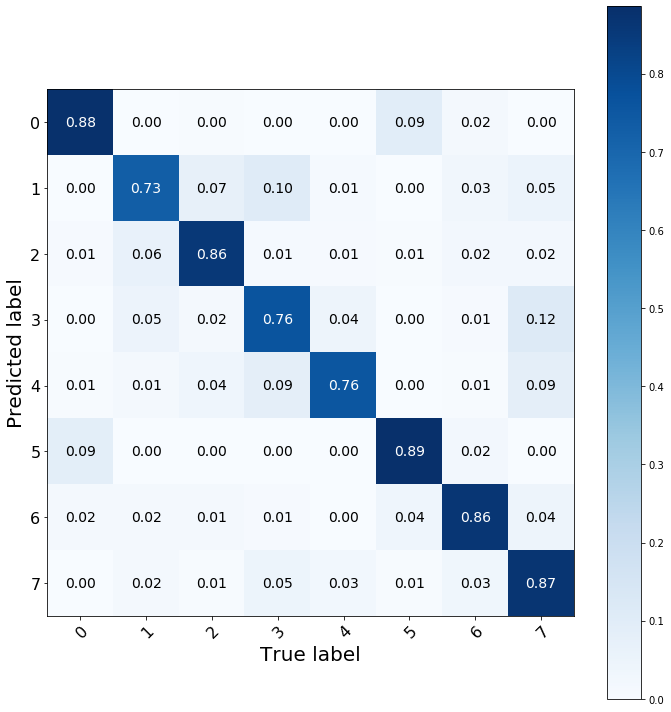

In [6]:
plot_confusion_matrix(matrix=lstm_matrix)

In [7]:
cnn_args = {
    'model': 'cnn',
    'name': 'Demon-8',
    'sub_folder': 'ConvNet',
    'dataset': 'capg',
    'gesture_num': 8,
    'epoch': 30,
    'train_batch_size': 128,
    'valid_batch_size': 1024,
    'lr': 0.001,
    'lr_step': 50
}

In [8]:
cnn_matrix = cnn_test(cnn_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[3308   11  110    9   16  276   31   39]
 [   9 2810  238  492   52    3   53  143]
 [  35  474 2670  169  249    5   59  139]
 [   2  568   72 2819  122    1   22  194]
 [   5  281  179  705 2354    1   16  259]
 [ 588    9   21    5    6 3015  115   41]
 [ 121  215  121  163   86  156 2531  407]
 [   8  193   68  414  188   17   54 2858]]
test accuracy: 0.7345


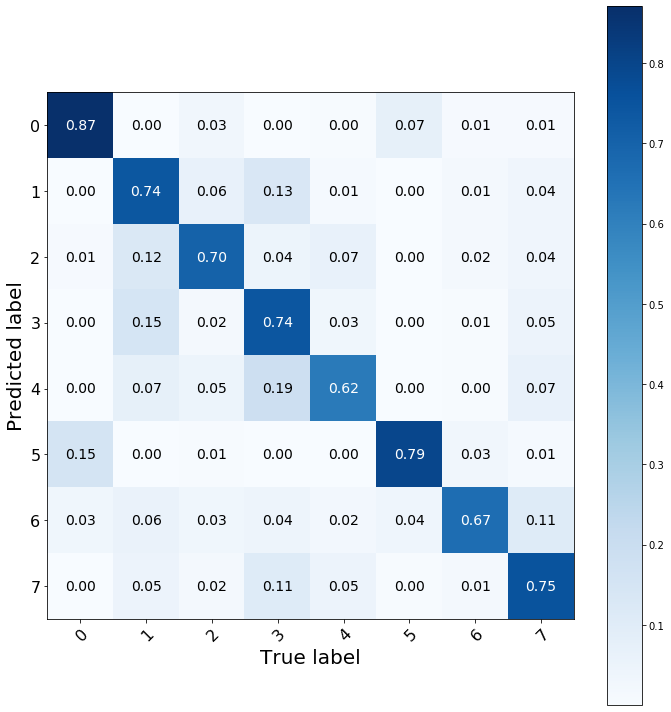

In [9]:
plot_confusion_matrix(matrix=cnn_matrix)

In [10]:
c3d_args = {
    'model': 'c3d',
    'name': 'Demon-8',
    'sub_folder': 'C3D',
    'dataset': 'capg',
    'gesture_num': 8,
    'epoch': 3,
    'train_batch_size': 256,
    'valid_batch_size': 1024,
    'lr': 0.001,
    'lr_step': 5
}

In [11]:
c3d_matrix = c3d_test(c3d_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[3583    2   10    0    1  178   24    2]
 [   6 3254  158  181   44    1   80   76]
 [   9  241 3367   19   71    0   61   32]
 [   0  203   19 3234  143    0   13  188]
 [   2   50   45  173 3475    0    5   50]
 [ 257    4    2    0    1 3486   46    4]
 [  37   48   31   13   12   37 3592   30]
 [   4   54   29  100  149    2   59 3403]]
test accuracy: 0.9007


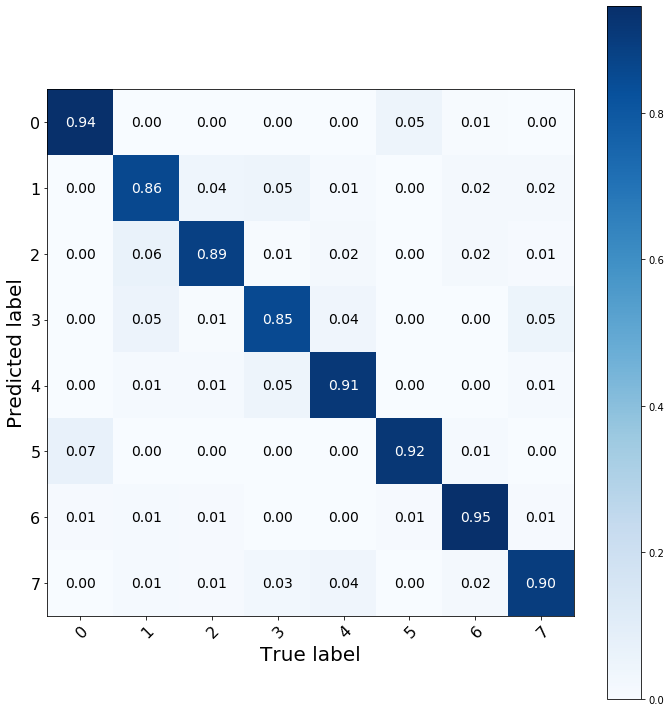

In [12]:
plot_confusion_matrix(matrix=c3d_matrix)

In [13]:
mlp_args = {
    'model': 'mlp',
    'name': 'Demon-8',
    'sub_folder': 'MLP',
    'dataset': 'capg',
    'gesture_num': 8,
    'epoch': 200,
    'train_batch_size': 512,
    'valid_batch_size': 2048,
    'lr': 0.001,
    'lr_step': 40
}

In [14]:
mlp_matrix = mlp_test(mlp_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[2430   32  202   37   99  650  245  105]
 [  38 1747  437  899  174   16  182  307]
 [ 117  439 1950  314  518   42  216  204]
 [  11  561  197 2107  386    8  121  409]
 [  64  226  467  597 1989   19  107  331]
 [ 892   27   80   34   32 2218  465   52]
 [ 151  201  227  376  209  281 2077  278]
 [  34  310  193  600  393   31  342 1897]]
test accuracy: 0.5396


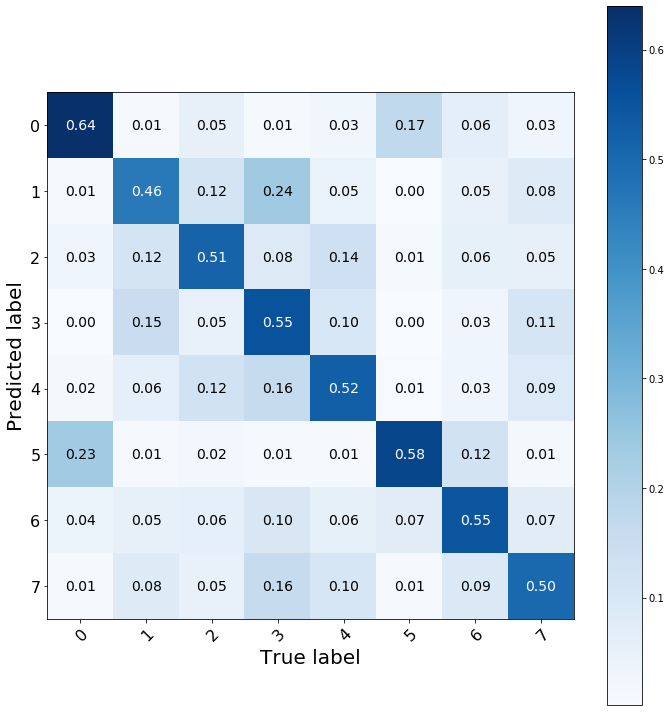

In [15]:
plot_confusion_matrix(matrix=mlp_matrix)